<a href="https://colab.research.google.com/github/MohdSiddiq12/Cats_vs_Dogs_CNN_Classifier/blob/main/cat_v_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#code for installing kaggle datasets
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
#Kaggle API token for cats-v-dogs dataset
!kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:06<00:00, 44.5MB/s]
100% 218M/218M [00:06<00:00, 33.2MB/s]


In [10]:
#downloaded dataset is in zip mode 
import zipfile 
zipref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zipref.extractall('/content') #extracting from zip
zipref.close()

In [11]:
#neccesary imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling3D,Flatten
import matplotlib.pyplot as plt
import numpy as np

In [51]:
#generators divide data into batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/training_set/training_set",
    labels='inferred',
    batch_size=32,
    label_mode= 'int',
    image_size=(256,256)
)

Found 8005 files belonging to 2 classes.


In [52]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels='inferred',
    batch_size=32,
    label_mode= 'int',
    image_size=(256,256)
)

Found 2023 files belonging to 2 classes.


In [53]:
#Normalizing images
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [54]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from tensorflow.python.ops.gen_nn_ops import conv2d
#Creating CNN architecture

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [89]:
history = model.fit(train_ds,epochs=2,validation_data = test_ds)

Epoch 1/2
251/251 [==============================] - 23s 91ms/step - loss: 0.4914 - accuracy: 0.7599 - val_loss: 0.6981 - val_accuracy: 0.7039
Epoch 2/2
251/251 [==============================] - 23s 91ms/step - loss: 0.3440 - accuracy: 0.8473 - val_loss: 0.8714 - val_accuracy: 0.7064


In [58]:
test_loss, test_accuracy = model.evaluate(test_ds)
print('Loss:', test_loss)
print('accuracy:', test_accuracy)

64/64 [==============================] - 3s 47ms/step - loss: 0.6527 - accuracy: 0.6337
Loss: 0.6527156233787537
accuracy: 0.6337122917175293


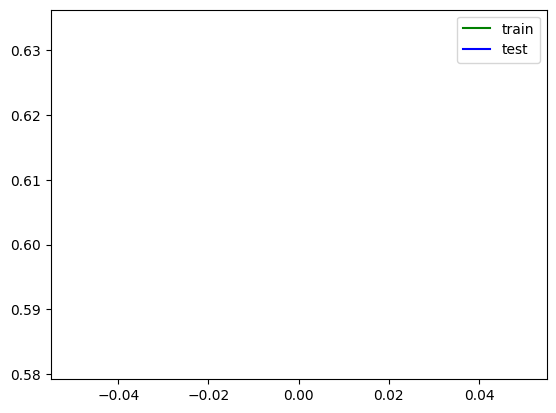

In [59]:
plt.plot(history.history['accuracy'],color='green',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [60]:
#lets test our model
import cv2

In [61]:
D= cv2.imread('/content/labrador-retriever-1210559__480.jpg')

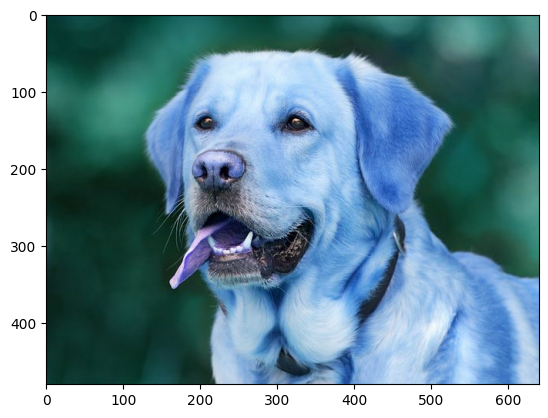

In [75]:
plt.imshow(D)

In [63]:
D.shape

(480, 640, 3)

In [41]:
new_D = cv2.resize(D,(256,256))

In [64]:
batch = np.expand_dims(new_D, axis=0)

In [76]:
model.predict(batch)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

In [91]:
S = cv2.imread('/content/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg')

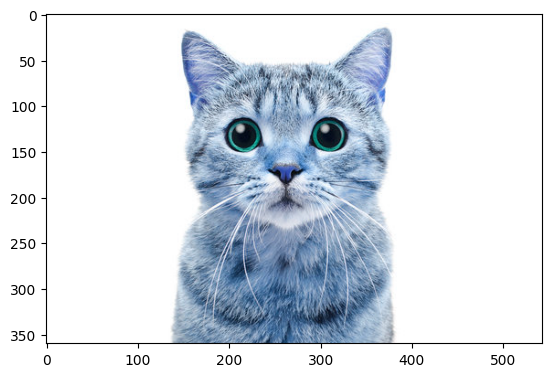

In [92]:
plt.imshow(S)

In [93]:
S.shape

(360, 543, 3)

In [94]:
new_S = cv2.resize(S,(256,256))

In [96]:
cat = np.expand_dims(new_S,axis=0)

In [97]:
model.predict(cat)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)